## notebook to pull Alpha Vantage share prices from API
## and plot in Bokeh
https://medium.com/alpha-vantage/get-started-with-alpha-vantage-data-619a70c7f33a

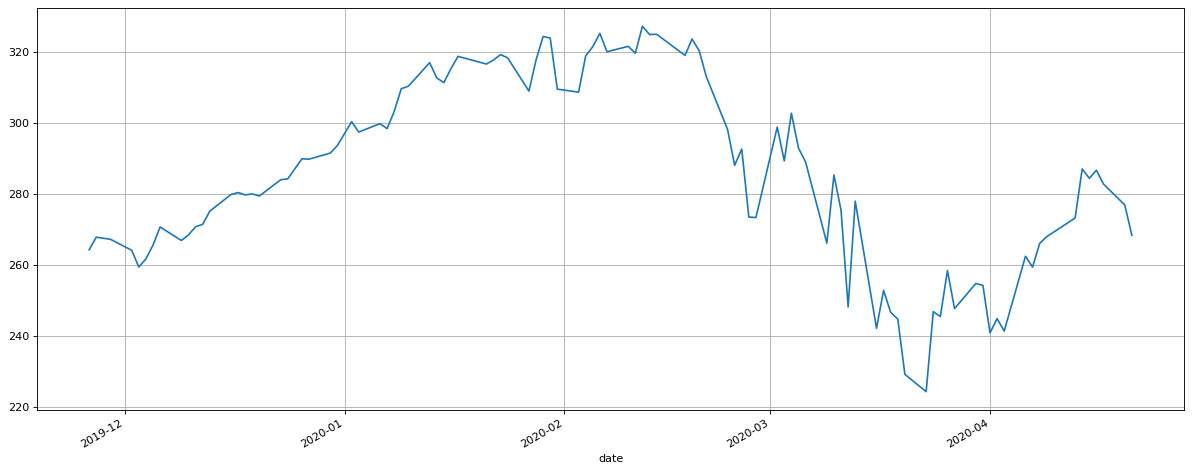

In [48]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# Your key here
key = 'A0YD8RR1JNNH5Z1G'
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
aapl_data, aapl_meta_data = ts.get_daily(symbol='AAPL')
# aapl_sma is a dict, aapl_meta_sma also a dict
aapl_sma, aapl_meta_sma = ti.get_sma(symbol='AAPL')


# Visualization
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_data['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

In [49]:
aapl_data['date'] = aapl_data.index

In [50]:
aapl_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-04-21,276.28,277.2500,265.4300,268.37,45003271.0,2020-04-21
2020-04-20,277.95,281.6800,276.8500,276.93,32503750.0,2020-04-20
2020-04-17,284.69,286.9450,276.8600,282.80,53812478.0,2020-04-17
2020-04-16,287.38,288.1975,282.3502,286.69,39281290.0,2020-04-16
2020-04-15,282.40,286.3300,280.6300,284.43,32788641.0,2020-04-15
...,...,...,...,...,...,...
2019-12-03,258.31,259.5300,256.2900,259.45,29377268.0,2019-12-03
2019-12-02,267.27,268.2500,263.4500,264.16,23693550.0,2019-12-02
2019-11-29,266.60,268.0000,265.9000,267.25,11654363.0,2019-11-29


## Bokeh plot
- http://docs.bokeh.org/en/1.0.2/docs/user_guide/examples/tools_hover_tooltip_formatting.html
- https://docs.bokeh.org/en/latest/docs/user_guide/tools.html#formatting-tooltip-fields

In [52]:
import numpy as np

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

def datetime(x):
    return np.array(x, dtype=np.datetime64)

source = ColumnDataSource(data={
    'date'      : datetime(aapl_data['date']),
    'adj close' : aapl_data['4. close'],
    'volume'    : aapl_data['5. volume'],
})

p = figure(plot_height=250, x_axis_type="datetime", tools="", toolbar_location=None,
           title="Share price", sizing_mode="scale_width")
p.background_fill_color="#f5f5f5"
p.grid.grid_line_color="white"
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.axis.axis_line_color = None

p.line(x='date', y='adj close', line_width=2, color='#ebbd5b', source=source)

p.add_tools(HoverTool(
    tooltips=[
        ( 'date',   '@date{%F}'            ),
        ( 'close',  '$@{adj close}{0.2f}' ), # use @{ } for field names with spaces
        ( 'volume', '@volume{0.00 a}'      ),
    ],

    formatters={
        '@date'        : 'datetime', # use 'datetime' formatter for 'date' field
        'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                  # use default 'numeral' formatter for other fields
    },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

show(p)